In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
# Load dataset (assuming a CSV file with 'text' and 'label' columns)
df = pd.read_csv('OnionOrNot.csv')

In [11]:
df.head(25).T #this way you can display columns as rows.

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
text,Entire Facebook Staff Laughs As Man Tightens P...,Muslim Woman Denied Soda Can for Fear She Coul...,Bold Move: Hulu Has Announced That They’re Gon...,Despondent Jeff Bezos Realizes He’ll Have To W...,"For men looking for great single women, online...",Kim Jong-Un Wonders If Nuclear Threats Distrac...,"Omaha dad finds pot brownies, eats 4 of them, ...","Pokémon Go player stabbed, keeps playing",Job Placement Service Helps Students Who Fail ...,Idiot Zoo Animal With Zero Predators Still Pro...,...,Ohio parents sue their olympic gold medalist d...,Match-predicting koala sacked for poor results,Nation Demands New Photograph Of Edward Snowden,"Gaunt, Hollow-Eyed Big Bird Enters Sixth Day O...",Court: 93-Year-Old Kills Wife Of 70 Years Beca...,What’s Next For Hillary Clinton?,Life: Animal Rights FTW! Popeyes Has Announced...,Man Putting Off Starting Family To Focus On Tr...,Coach’s Un-Athletic Son Going To Get Fucking R...,Deputies ask man to quit calling about his sto...
label,1,0,1,1,1,1,0,0,1,1,...,0,0,1,1,0,1,1,1,1,0


In [12]:
# Checking for missing values
df.dropna(inplace=True)

In [13]:
# Define X (features) and y (labels)
X = df['text']  # Headlines/articles
y = df['label']  # 1 for Onion, 0 for NotTheOnion

In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
# Train models
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [17]:
# Cross-validation
cv_results = {}
for model in models:
    model_name = model.__class__.__name__
    accuracy = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=5).mean()
    cv_results[model_name] = accuracy

In [18]:
# Display cross-validation results
cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=['Accuracy'])
display(cv_df)

,Accuracy
RandomForestClassifier,0.626389
LinearSVC,0.816111
MultinomialNB,0.818889
LogisticRegression,0.818056


In [21]:
# Train best model (LinearSVC for this case)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [22]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      3798
           1       0.84      0.65      0.74      2202

    accuracy                           0.83      6000
   macro avg       0.83      0.79      0.80      6000
weighted avg       0.83      0.83      0.82      6000



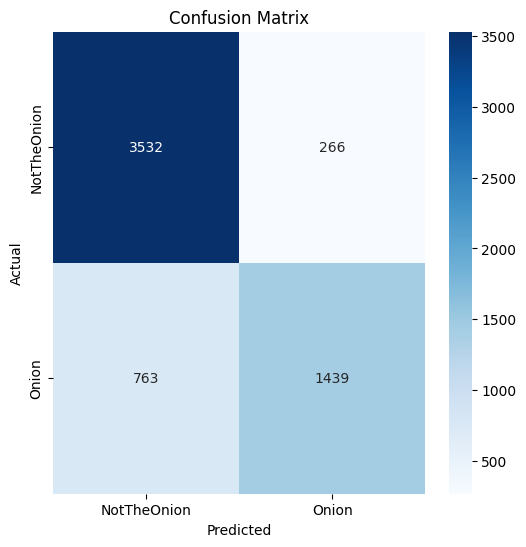

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=['NotTheOnion', 'Onion'], yticklabels=['NotTheOnion', 'Onion'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Predicting new headlines
new_headline = ["Florida Man Robs Bank Using Alligator"]
new_tfidf = vectorizer.transform(new_headline)
print("Prediction:", model.predict(new_tfidf))

Prediction: [0]


### Results Summary:

- **MultinomialNB (81.89%)**, **Logistic Regression (81.80%)**, and **LinearSVC (81.61%)** performed best, while **RandomForest (62.64%)** lagged.
- The model correctly identifies **real news (93% recall)** but struggles with **satire (65% recall)**.
- **Overall accuracy: 83%**, but some satire is misclassified as real.  
- Further improvements could include **BERT, hyperparameter tuning, or feature engineering**.